# Direct Marketing Decision Tree Regressor

To build a decision tree regressor to predict the amount spent by the customer

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import os
os.getcwd()

'C:\\Users\\Varun R Bhat\\Downloads\\Jigsaw\\Direct_Marketing_Data_Set'

In [2]:
dm = pd.read_csv('directmarketing.csv',sep=',',header=0)
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [3]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int64
Cust_Id        1000 non-null int64
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [4]:
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [5]:
# History variable
dm.groupby('History',as_index=False).agg({'AmountSpent':np.mean})

,History,AmountSpent
0,High,2186.137255
1,Low,357.086957
2,Medium,950.400943


In [10]:
dm[dm.History.isnull()]['AmountSpent'].mean()

1239.90099009901

In [12]:
# Create separate category 'Missing' 
dm['History'] = dm.History.replace({np.nan:'Missing'})
print(dm.History.unique())
dm.head()

['High' 'Low' 'Medium' 'Missing']


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [14]:
# Convert Children and Catalogs into categorical variables
dm['Children'] = dm.Children.astype('category')
dm['Catalogs'] = dm.Catalogs.astype('category')
dm.dtypes

Age              object
Gender           object
OwnHome          object
Married          object
Location         object
Salary            int64
Children       category
History          object
Catalogs       category
AmountSpent       int64
Cust_Id           int64
dtype: object

In [15]:
# Target variable and Predictor variables
y = dm['AmountSpent']
y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [16]:
X = dm.drop(['AmountSpent','Cust_Id'],axis=1)
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [17]:
# Dummy variables
X = pd.get_dummies(X)
X.head()

,Salary,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,...,Children_2,Children_3,History_High,History_Low,History_Medium,History_Missing,Catalogs_6,Catalogs_12,Catalogs_18,Catalogs_24
0,47500,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,63600,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,13500,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,85600,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,68400,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [56]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [57]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3,random_state=200)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [58]:
reg.score(X_test,y_test)

0.5415419045351529

In [59]:
reg.feature_importances_

array([0.71960982, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09804426, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04055488, 0.        , 0.        , 0.        ,
       0.14179104, 0.        , 0.        , 0.        ])

In [61]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.719610
Catalogs_6        0.141791
Location_Close    0.098044
History_High      0.040555
Age_Middle        0.000000
dtype: float64

In [62]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

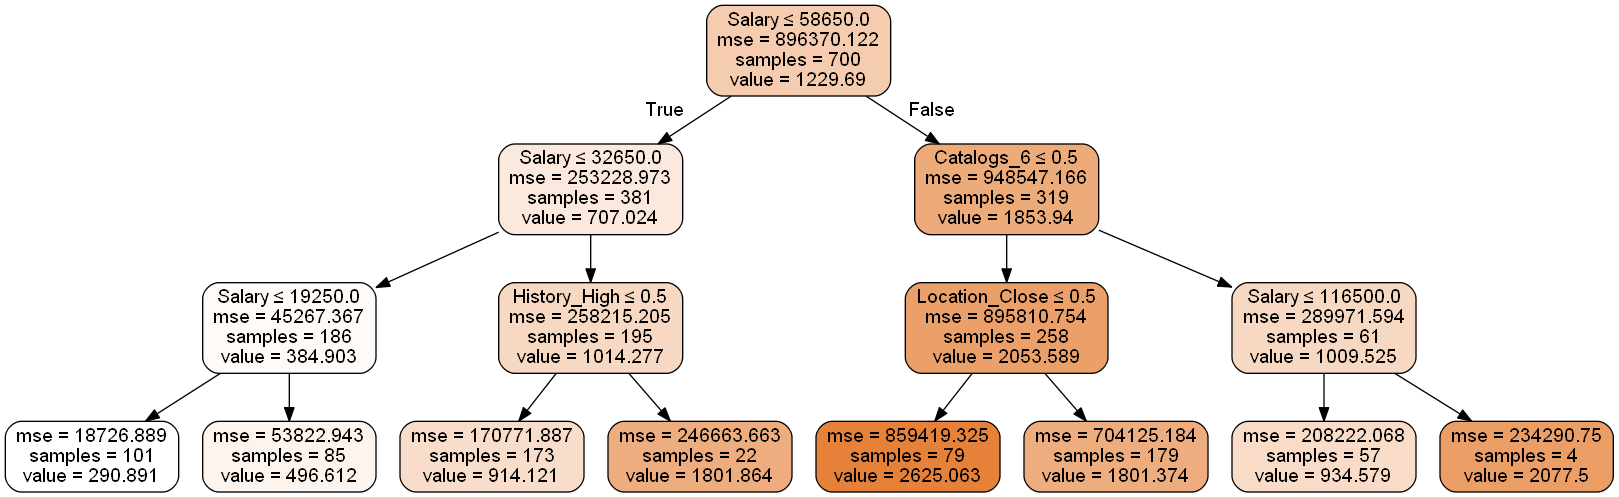

In [63]:
from IPython.display import Image
Image(graph.create_png())

### Grid Search-Cross Validation

In [74]:
reg=tree.DecisionTreeRegressor(max_depth=3,random_state=200)

In [75]:
mod=model_selection.GridSearchCV(reg,param_grid={'max_depth':[2,3,4,5,6]},cv=5)
mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=200,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
mod.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [79]:
# Running model with max_depth=6 as per best_estimator_
reg2=tree.DecisionTreeRegressor(max_depth=6,random_state=200)
reg2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [80]:
reg2.score(X_test,y_test)

0.7258993975509244